<a href="https://colab.research.google.com/github/solayman-cs/COVID/blob/main/Team_2_COVID_Analysis_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/ML_Workshop/COVID

/content/drive/My Drive/ML_Workshop/COVID


In [ ]:
import pandas as pd
import numpy as np

#df = pd.read_excel("COVID data.xlsx")

df = pd.read_excel("COVID data - Team 2.xlsx")
#df = pd.read_excel("COVID data - Team 1.xlsx")

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Define the mapping
label_mapping = {"Not Detected": 0, "Positive": 1}


df["PCR"] = df["PCR"].map(label_mapping)

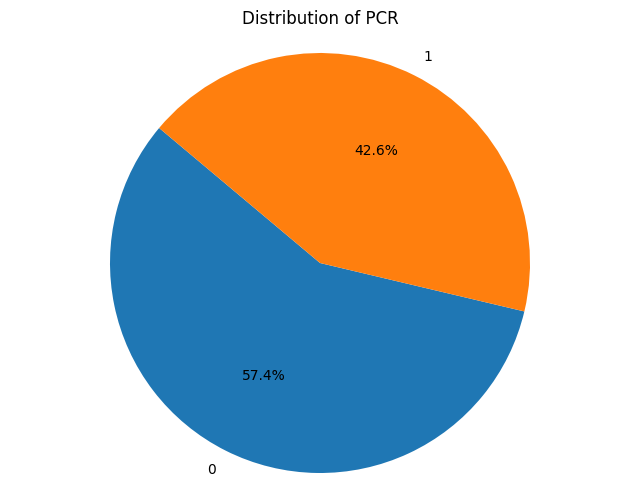

In [ ]:
import matplotlib.pyplot as plt

y = df['PCR']

counts = y.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PCR')
plt.axis('equal')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#-------------------------------------
#from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,PCR
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,54.780313,31.155354,75.533579,125.965961,74.167433,92.735051,15.969641,97.527967,0.425943
std,18.665951,11.209585,13.157305,19.252795,16.561942,9.787131,3.700828,3.910369,0.494713
min,0.600000,13.730000,19.000000,38.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,41.950000,25.480000,67.000000,114.000000,63.000000,91.000000,15.000000,97.100000,0.000000
50%,56.600000,29.960000,76.000000,125.000000,73.000000,95.000000,16.000000,97.900000,0.000000
75%,67.700000,34.720000,85.000000,137.000000,84.000000,97.000000,18.000000,98.500000,1.000000
max,99.500000,207.480000,126.000000,210.000000,172.000000,100.000000,36.000000,103.400000,1.000000


## Explanatory Data Analysis

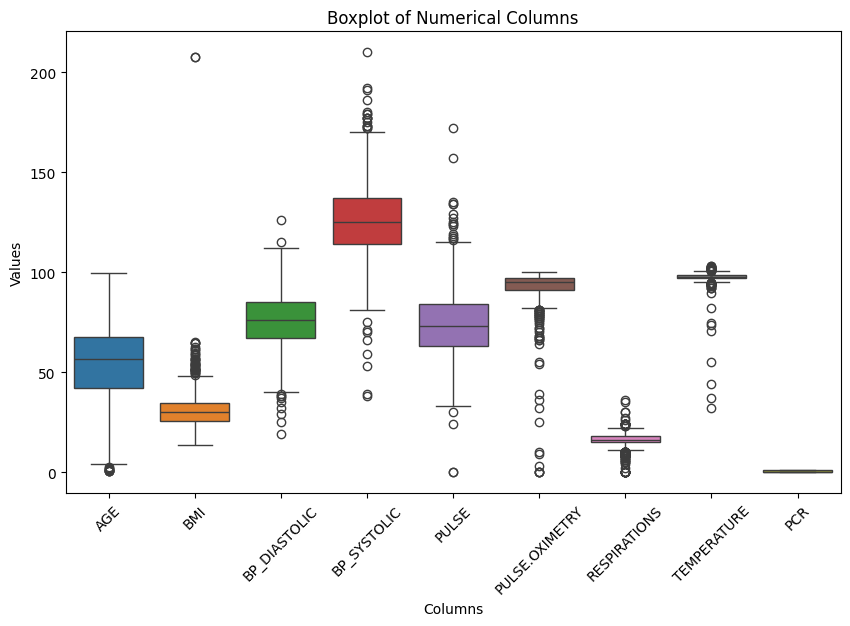

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

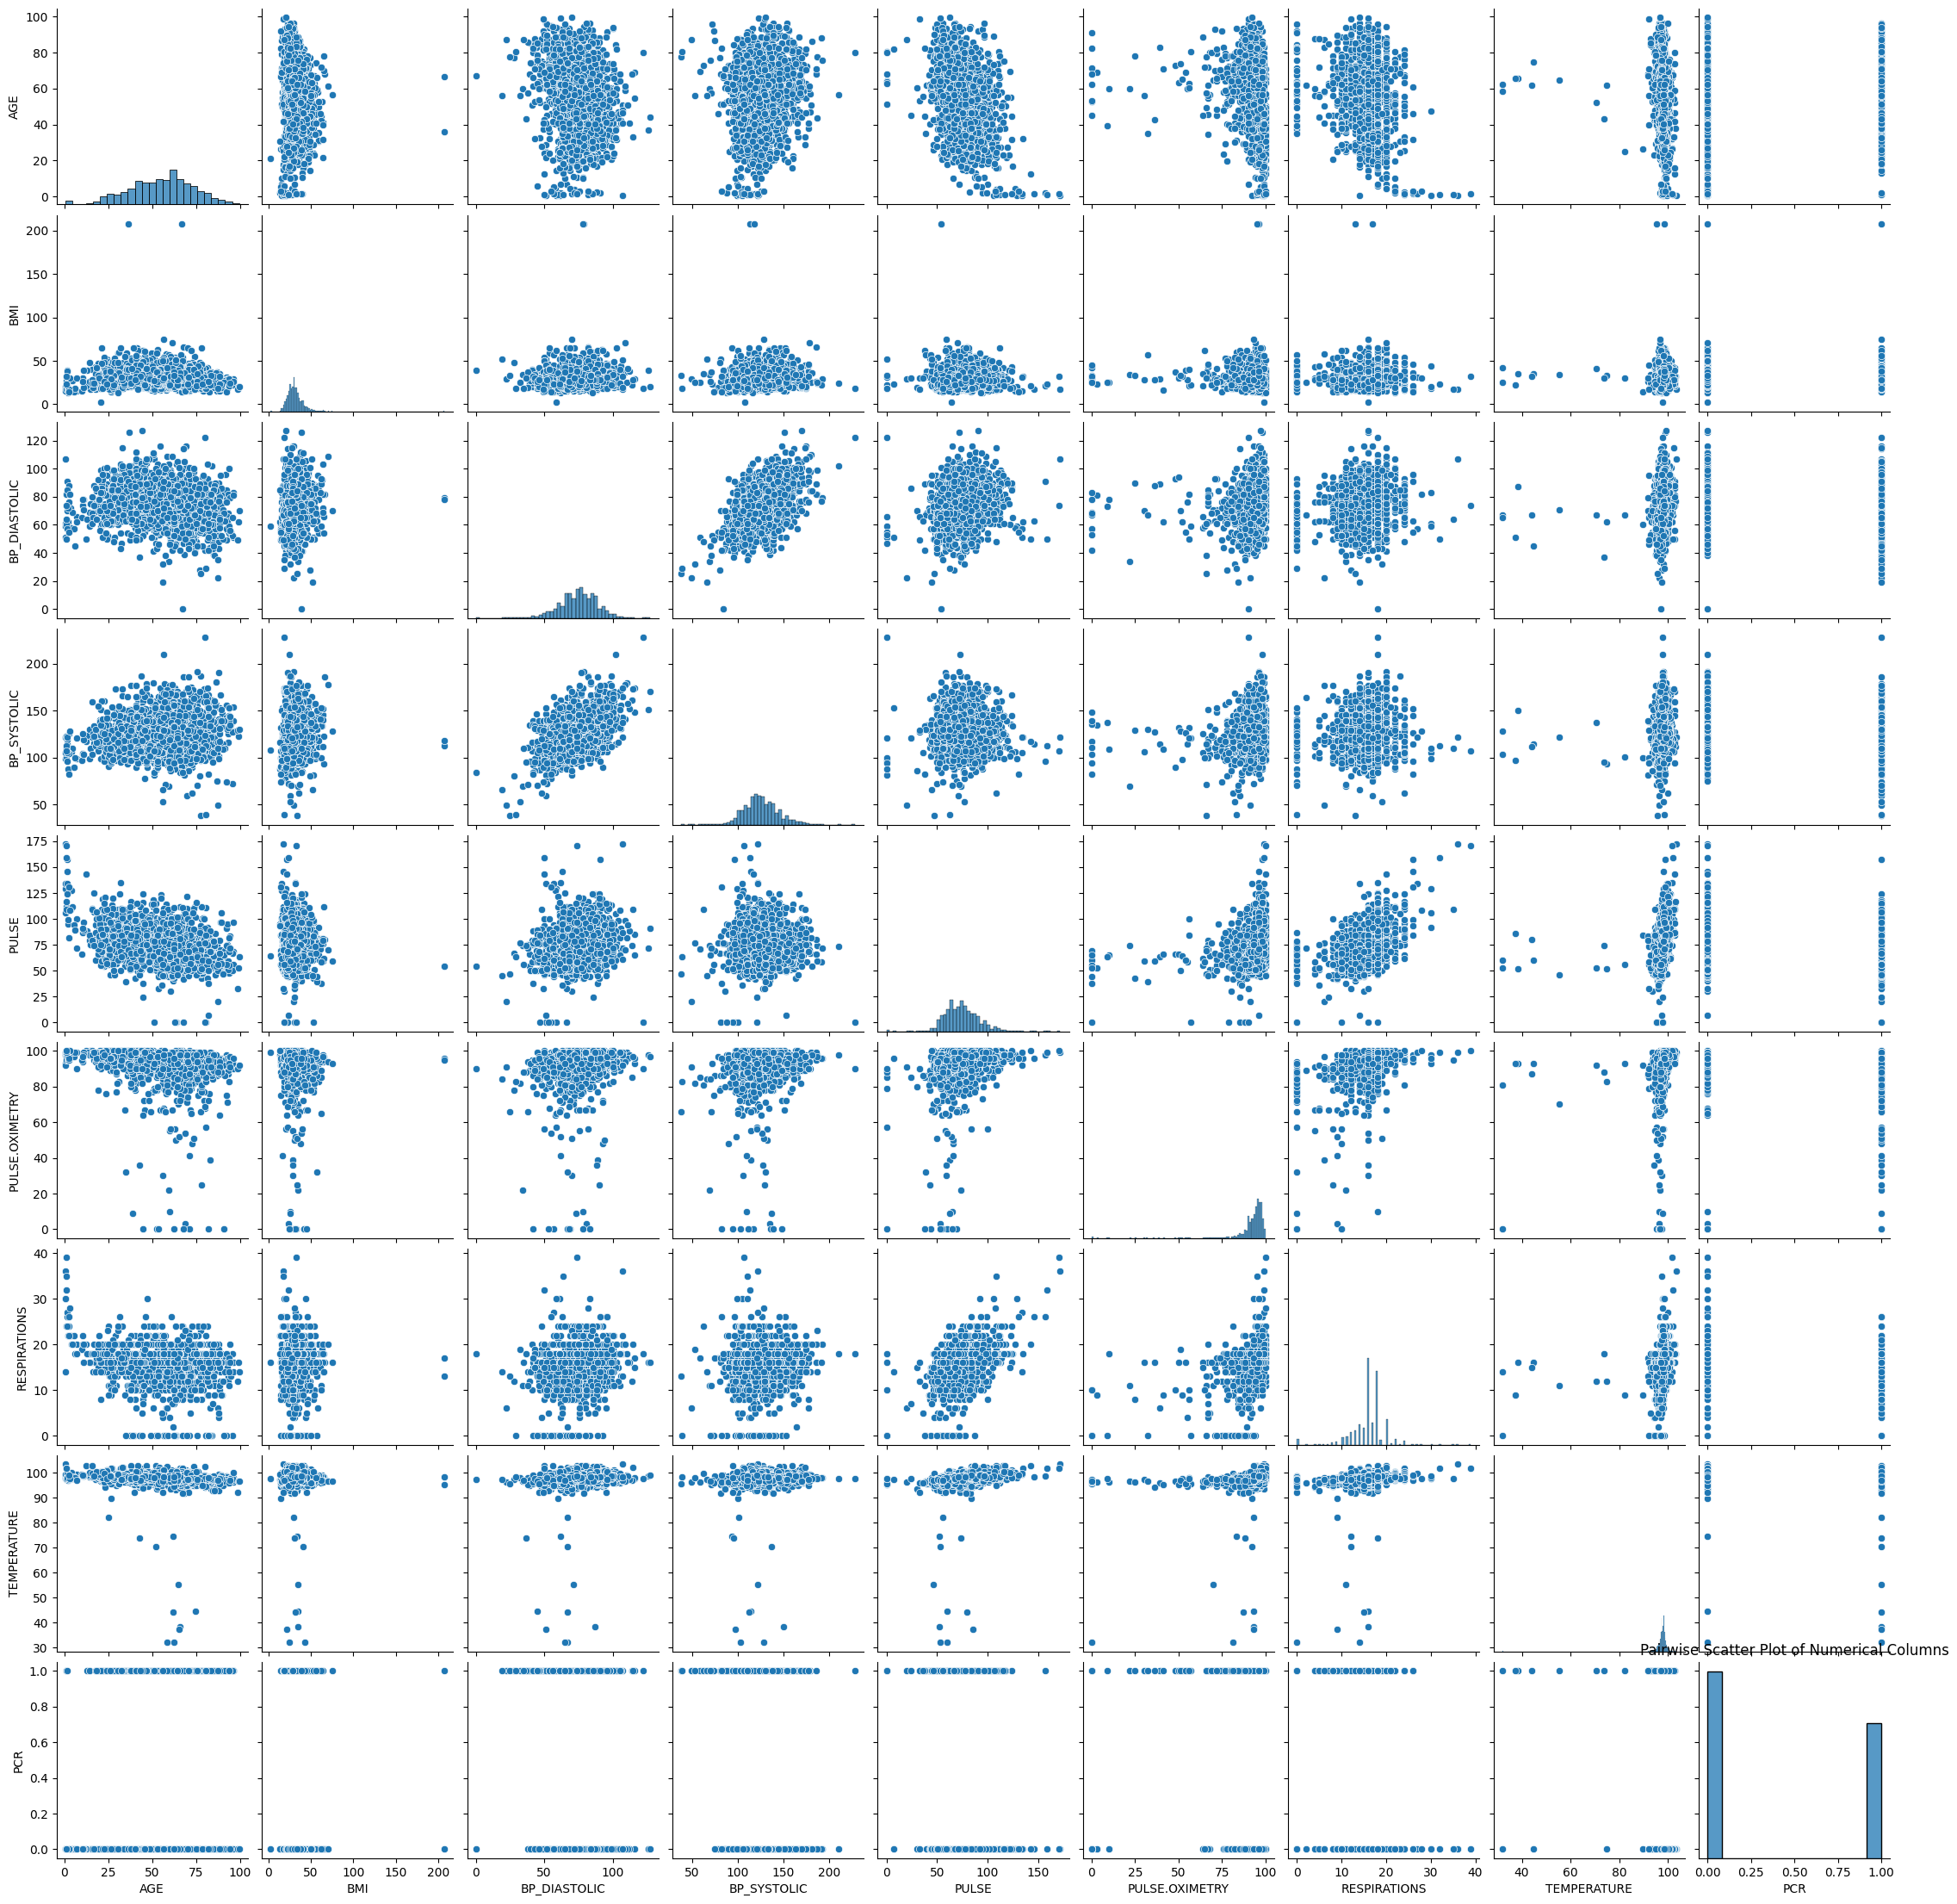

In [ ]:
# Scatter plot (pairwise)
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

# Remove Outliers

In [ ]:
# Calculate Interquartile Range (IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier_indices_iqr = np.where((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))


outlier_indices = [index for sublist in outlier_indices_iqr for index in sublist]

# Remove outliers
df_cleaned = df.drop(outlier_indices, axis=0)
df = df_cleaned

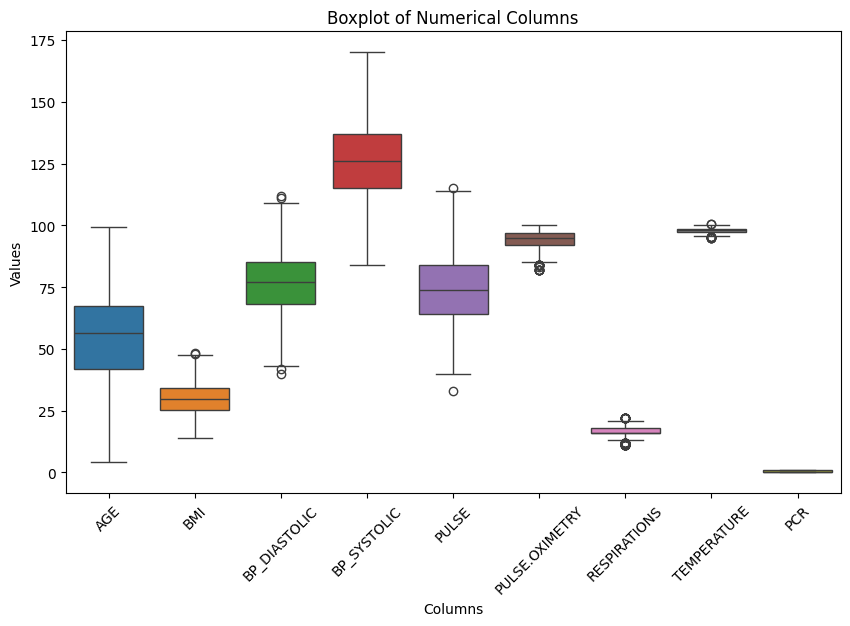

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Preprocess

In [ ]:
X = df.drop(columns=['PCR', 'hashed_mrn'])
y = df['PCR']

X

,SEX,ETHNICITY,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,R07.9,J18.9,R06.00,Z11.59,J02.9,R07.89,R52,I50.9
8,FEMALE,NOT HISPANIC OR LATINO,44.9,26.57,84,118,98,98,16,98.5,True,True,False,False,False,False,False,True,False,False
9,FEMALE,NOT HISPANIC OR LATINO,68.5,23.91,72,110,74,97,18,98.5,True,True,False,False,True,False,False,False,False,False
10,MALE,HISPANIC OR LATINO,52.1,29.96,73,119,71,89,18,97.5,False,True,False,False,False,False,False,False,False,False
13,FEMALE,NOT HISPANIC OR LATINO,26.6,23.62,74,116,61,97,15,97.5,False,False,False,False,False,False,False,True,False,False
16,MALE,NOT HISPANIC OR LATINO,75.8,27.46,69,135,67,98,22,98.4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,FEMALE,NOT HISPANIC OR LATINO,62.4,37.38,65,134,75,93,16,97.0,False,True,False,False,False,False,False,False,False,False
1082,MALE,NOT HISPANIC OR LATINO,64.2,27.83,83,121,92,93,17,99.1,True,False,False,False,False,False,False,False,False,False
1083,FEMALE,HISPANIC OR LATINO,56.4,30.23,72,129,78,98,22,98.3,True,True,False,False,False,False,True,False,False,False
1084,FEMALE,HISPANIC OR LATINO,62.3,33.09,84,133,71,96,18,98.5,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Categorical Encoding
X = pd.get_dummies(X)
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R06.00,Z11.59,J02.9,R07.89,R52,I50.9,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,44.9,26.57,84,118,98,98,16,98.5,True,True,...,False,False,False,True,False,False,True,False,False,True
9,68.5,23.91,72,110,74,97,18,98.5,True,True,...,True,False,False,False,False,False,True,False,False,True
10,52.1,29.96,73,119,71,89,18,97.5,False,True,...,False,False,False,False,False,False,False,True,True,False
13,26.6,23.62,74,116,61,97,15,97.5,False,False,...,False,False,False,True,False,False,True,False,False,True
16,75.8,27.46,69,135,67,98,22,98.4,True,True,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,62.4,37.38,65,134,75,93,16,97.0,False,True,...,False,False,False,False,False,False,True,False,False,True
1082,64.2,27.83,83,121,92,93,17,99.1,True,False,...,False,False,False,False,False,False,False,True,False,True
1083,56.4,30.23,72,129,78,98,22,98.3,True,True,...,False,False,True,False,False,False,True,False,True,False
1084,62.3,33.09,84,133,71,96,18,98.5,True,False,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
# Iterate over columns
for column in X.columns:
    if X[column].dtype == bool:
        X[column] = X[column].replace({False: 0, True: 1})
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R06.00,Z11.59,J02.9,R07.89,R52,I50.9,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,44.9,26.57,84,118,98,98,16,98.5,1,1,...,0,0,0,1,0,0,1,0,0,1
9,68.5,23.91,72,110,74,97,18,98.5,1,1,...,1,0,0,0,0,0,1,0,0,1
10,52.1,29.96,73,119,71,89,18,97.5,0,1,...,0,0,0,0,0,0,0,1,1,0
13,26.6,23.62,74,116,61,97,15,97.5,0,0,...,0,0,0,1,0,0,1,0,0,1
16,75.8,27.46,69,135,67,98,22,98.4,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,62.4,37.38,65,134,75,93,16,97.0,0,1,...,0,0,0,0,0,0,1,0,0,1
1082,64.2,27.83,83,121,92,93,17,99.1,1,0,...,0,0,0,0,0,0,0,1,0,1
1083,56.4,30.23,72,129,78,98,22,98.3,1,1,...,0,0,1,0,0,0,1,0,1,0
1084,62.3,33.09,84,133,71,96,18,98.5,1,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
y

8       0
9       0
10      1
13      0
16      0
       ..
1081    0
1082    0
1083    0
1084    0
1085    1
Name: PCR, Length: 847, dtype: int64

## Balance the data

In [ ]:
x_train_randOverSample = X.copy()
y_train_randOverSample = y.copy()

print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))

X = x_train_randOverSample
y = y_train_randOverSample

Before OverSampling- counts of label '1': 341
Before OverSampling- counts of label '0': 506 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (1012, 22)
After OverSampling with RandomOverSampler- y_train: (1012,) 

After OverSampling with RandomOverSampler- counts of label '1': 506
After OverSampling with RandomOverSampler- counts of label '0': 506


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.97797131, -0.04466901, -0.49847646, ..., -1.01727703,
         1.48865768, -1.48865768],
       [ 0.62398546, -1.00223101, -0.41677842, ...,  0.9830164 ,
         1.48865768, -1.48865768],
       [ 0.94987719,  0.43259206, -0.33508038, ..., -1.01727703,
        -0.67174611,  0.67174611],
       ...,
       [ 0.10705375, -0.74232133, -0.33508038, ...,  0.9830164 ,
         1.48865768, -1.48865768],
       [ 1.92193356, -1.83211809, -0.33508038, ..., -1.01727703,
        -0.67174611,  0.67174611],
       [ 0.59589135,  0.22284038, -0.08998625, ...,  0.9830164 ,
        -0.67174611,  0.67174611]])

## Models

# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

class_weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

#class_weight_ratio = 1

print(class_weight_ratio)


# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=class_weight_ratio)

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [20, 50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate
    'max_depth': [2, 3, 5, 7, 10, 20]  # Maximum depth of each tree
}


grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')


grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_


y_pred_xgb_best = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
print("Best XGBoost Parameters:", best_params_xgb)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb_best))


1.007936507936508
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}
XGBoost Accuracy: 0.7628458498023716
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       125
           1       0.78      0.73      0.76       128

    accuracy                           0.76       253
   macro avg       0.76      0.76      0.76       253
weighted avg       0.76      0.76      0.76       253



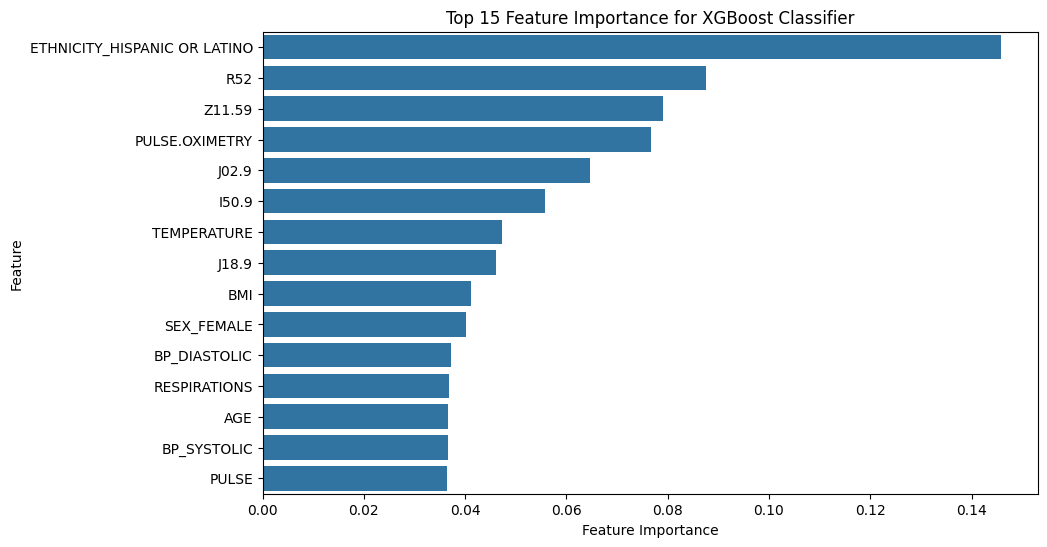

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance from the XGBoost model
feature_importance = best_xgb_model.feature_importances_

# Sort the feature importance and select the top 15
top_indices = np.argsort(feature_importance)[-15:]
top_feature_importance = feature_importance[top_indices]
top_feature_names_xgb = X.columns[top_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names_xgb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance for XGBoost Classifier')
plt.gca().invert_yaxis()
plt.show()

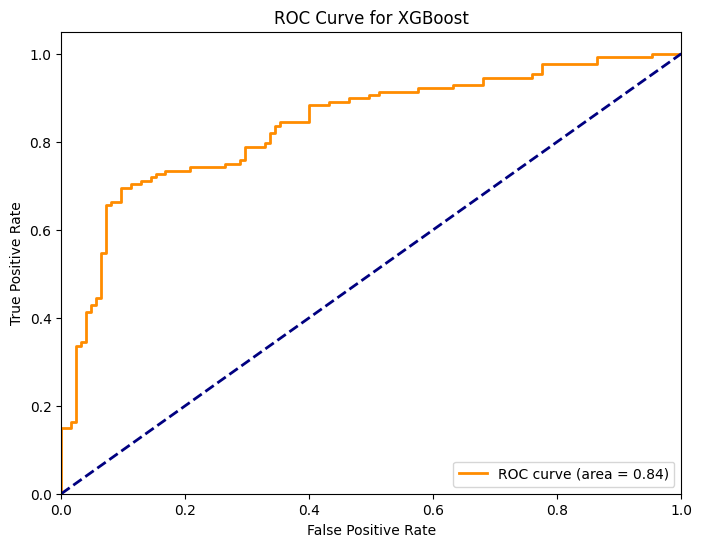

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_proba_xgb_best = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb_best)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [ ]:
##########   Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression(random_state=42)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
}


grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_


y_pred_lr_best = best_lr_model.predict(X_test_scaled)


print("Best Logistic Regression Parameters:", best_params)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr_best))


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7312252964426877
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       125
           1       0.75      0.70      0.73       128

    accuracy                           0.73       253
   macro avg       0.73      0.73      0.73       253
weighted avg       0.73      0.73      0.73       253



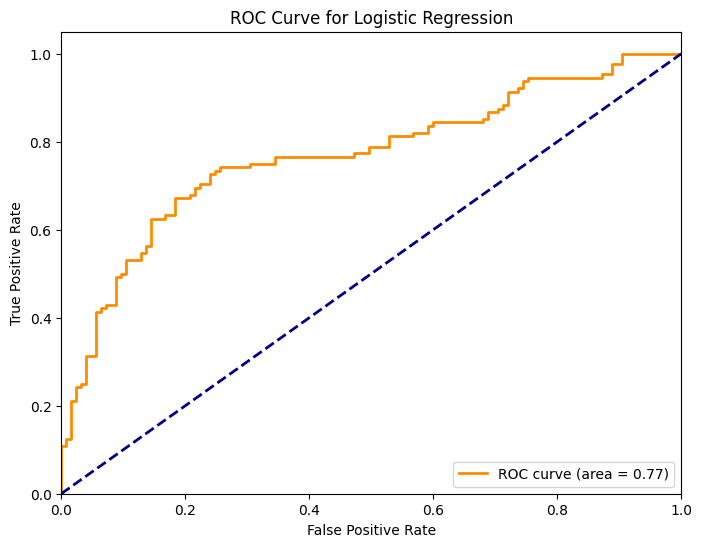

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_proba_lr_best = best_lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr_best)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

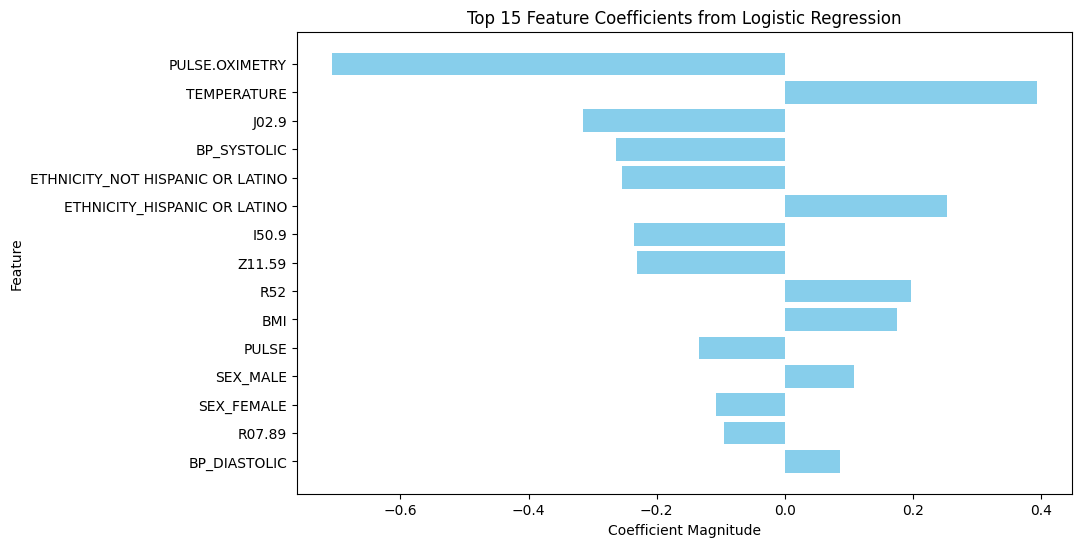

In [ ]:
import matplotlib.pyplot as plt


# Get coefficients and their corresponding feature names
coefficients = best_lr_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients and their names
df_coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort the coefficients by absolute value to get the most important features
df_coefficients_sorted = df_coefficients.reindex(df_coefficients['coefficient'].abs().sort_values(ascending=False).index)

# Select top N features to plot
top_n = 15
top_coefficients = df_coefficients_sorted.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_coefficients['feature'], top_coefficients['coefficient'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 15 Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### SVM

In [ ]:
##########   SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

# parameter grid

params_grid = {
    'C': [1, 2, 4, 5, 6, 12],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'probability': [True]
}



svm_model = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm = best_estimator.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", best_params)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Best Parameters: {'C': 12, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
SVM Accuracy: 0.7391304347826086
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       125
           1       0.73      0.76      0.75       128

    accuracy                           0.74       253
   macro avg       0.74      0.74      0.74       253
weighted avg       0.74      0.74      0.74       253



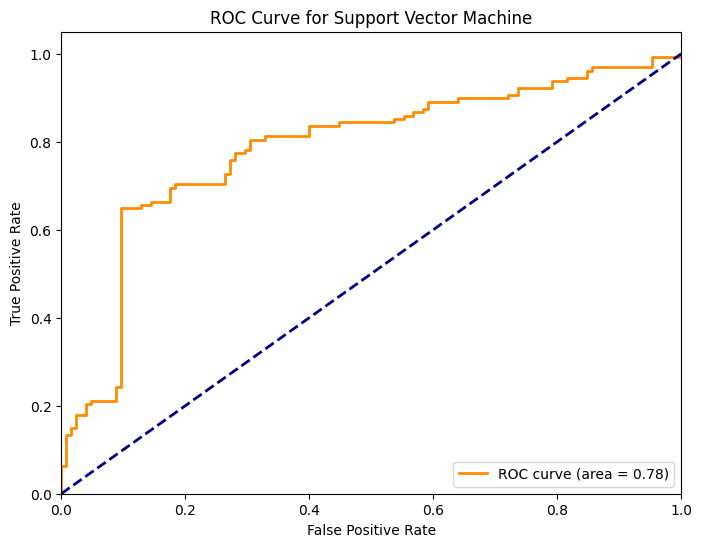

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_proba_svm_best = best_estimator.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm_best)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

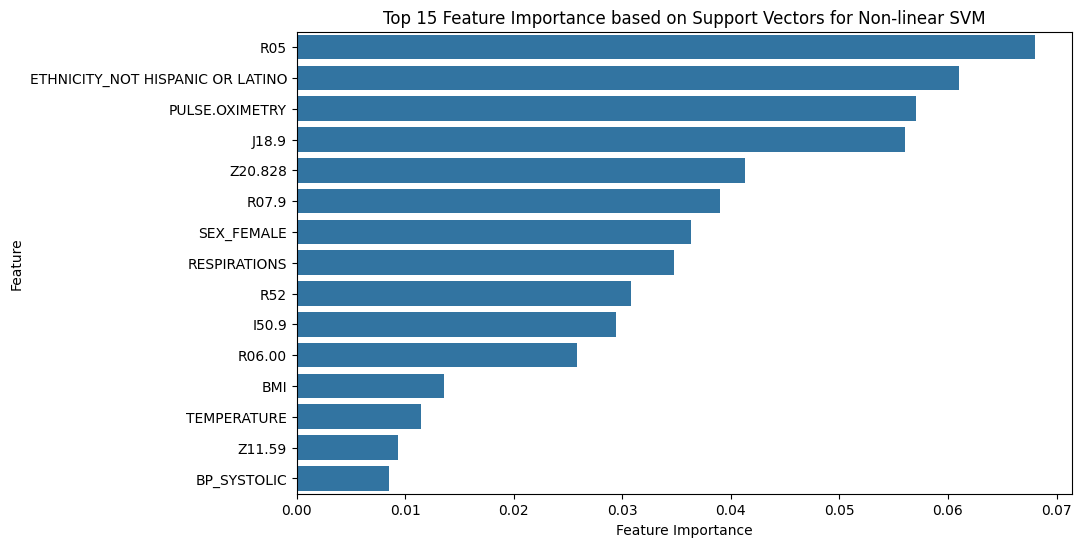

In [ ]:
import seaborn as sns
import numpy as np

# Get support vectors
support_indices = best_estimator.support_
support_vectors = X_train_scaled[support_indices]

# Calculate feature importance based on the frequency of support vectors
feature_importance = np.mean(support_vectors, axis=0)

# Sort the feature importance and select the top 15
top_indices = np.argsort(feature_importance)[-15:]
top_feature_importance = feature_importance[top_indices]
top_feature_names_svm = X_train.columns[top_indices]  # Assuming you have access to column names

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names_svm)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance based on Support Vectors for Non-linear SVM')
plt.gca().invert_yaxis()
plt.show()

 # Important Common Features

In [ ]:
# Extract the top features from each model
top_features_svm = set(top_feature_names_svm)
#top_features_rf = set(top_features.index)
top_feature_names_xgb = set(top_feature_names_xgb )
top_features_lr = set(top_coefficients['feature'])

# Find the common features among all models
#common_features = top_features_svm.intersection(top_features_rf, top_features_lr)
common_features = top_features_svm.intersection(top_features_lr, top_feature_names_xgb )

# Print the common features
print("Common Features Selected by All Models:")
for feature in common_features:
    print(feature)

Common Features Selected by All Models:
I50.9
BP_SYSTOLIC
Z11.59
R52
BMI
SEX_FEMALE
PULSE.OXIMETRY
TEMPERATURE


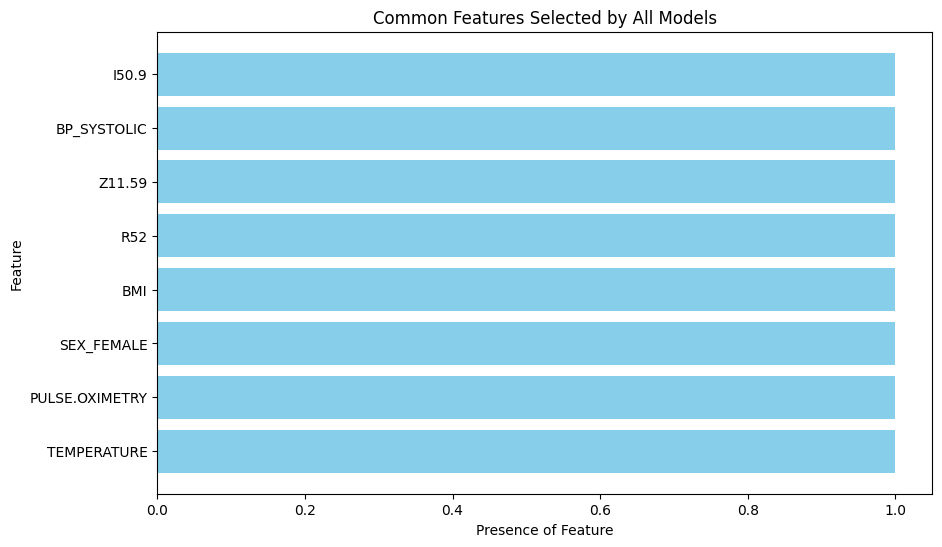

In [ ]:
import matplotlib.pyplot as plt

# Common features
common_features = list(common_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(common_features)), [1] * len(common_features), color='skyblue')
plt.xlabel('Presence of Feature')
plt.ylabel('Feature')
plt.title('Common Features Selected by All Models')
plt.yticks(range(len(common_features)), common_features)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()